In [1]:
# Task : 6
# Probelm statement :
# Data set link : https://www.kaggle.com/datasets/atharvjairath/flipkart-ecommerce-dataset

# 1.Analyse each and every attribute, create visual representations, give your valuable insights and understanding using python.
# 2. Create responsive dash board using dash boarding tools. (Must publish with global url)

# *Submit a github repo link flipkart csv file, analyse ipynb file for every cleaning step and insights, and 
# describe all understanding in readme file with dashboard global url link.
#Importing necessay libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Admin\AppData\Local\Temp\ipykernel_7136\2970474876.py:19: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Admin\AppData\Local\Temp\ipykernel_7136\2970474876.py:20: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
#Reading dataset
df=pd.read_csv('flipkart_com-ecommerce_sample.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [4]:
#checking null values
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [5]:
#As uniq_id is different for different product we can drop the column
df=df.drop(columns='uniq_id')

In [6]:
#dropping null values
df=df.dropna()

In [7]:
#again checking null values and we can see there are no null values
df.isnull().sum()

crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

In [8]:
#creating new dataset with only 4 required columns for analysis
flipkart_data= df[['product_name', 'product_category_tree','description','brand']].copy()

In [9]:
flipkart_data

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [10]:
#product_category_tree consist brand within subrand so will create function to split the delimiter and get only brand name
def clean_prod_category():
    primary_category = []
    
    # Iterate through each element in the 'product_category_tree' column
    for ele in flipkart_data['product_category_tree']: 
        ele = ele.replace('"]', "")
        category = ele[2:].split(" >>")
        primary_category.append(category[0])
        
    # Returning the clean data
    return primary_category

# Call the function and store the result in 'primary_category'
primary_category = clean_prod_category()

# Verifying the output
print(primary_category)


['Clothing', 'Furniture', 'Footwear', 'Clothing', 'Pet Supplies', 'Eternal Gandhi Super Series Crystal Paper Weight...', 'Clothing', 'Furniture', 'Footwear', 'Clothing', 'Footwear', 'Clothing', 'Clothing', 'Pens & Stationery', 'Clothing', 'Furniture', 'Footwear', 'Clothing', 'Furniture', 'Pet Supplies', 'Clothing', 'Footwear', 'Pet Supplies', 'Bengal Blooms Rose Artificial Plant  with Pot (3...', 'Clothing', 'Pens & Stationery', 'Pens & Stationery', 'Pens & Stationery', 'Clothing', 'Pens & Stationery', 'Clothing', 'Bags, Wallets & Belts', 'Clothing', 'Footwear', 'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware', "Vishudh Printed Women's Straight Kurta", "Vishudh Printed Women's Straight Kurta", "Vishudh Printed Women's Anarkali Kurta", 'BuildTrack PIR Wireless Motion Sensor - One Swit...', 'Skayvon SUMMERSIBLE SINGLE PHASE PUMP CONTROLLER...', "MASARA Solid Women's Straight Kurta", "Vishudh Printed Women's Straight Kurta", 'Tools & Hardware', 'Skayvon SUBMERSIBBLE THREE PH

In [11]:
#total brands we have is 261
primary_category=pd.DataFrame(primary_category,columns=["Category"])
print("Number of Unique Categories",len(primary_category["Category"].value_counts()))

Number of Unique Categories 261


In [12]:
primary_category_top=Counter(primary_category["Category"]).most_common(266)
primary_category_top

[('Jewellery', 3521),
 ('Clothing', 3129),
 ('Mobiles & Accessories', 1096),
 ('Automotive', 1010),
 ('Home Decor & Festive Needs', 859),
 ('Home Furnishing', 698),
 ('Computers', 572),
 ('Baby Care', 455),
 ('Tools & Hardware', 387),
 ('Footwear', 375),
 ('Kitchen & Dining', 363),
 ('Furniture', 180),
 ('Pens & Stationery', 174),
 ('Beauty and Personal Care', 155),
 ('Bags, Wallets & Belts', 151),
 ('Sports & Fitness', 108),
 ('Toys & School Supplies', 103),
 ('Home Improvement', 79),
 ('Cameras & Accessories', 72),
 ('Watches', 48),
 ('Health & Personal Care Appliances', 43),
 ('Sunglasses', 35),
 ('Gaming', 34),
 ('Pet Supplies', 29),
 ('Home & Kitchen', 24),
 ('Home Entertainment', 19),
 ('Eyewear', 10),
 ("Clovia Women's Full Coverage Bra", 9),
 ("Vishudh Printed Women's Straight Kurta", 8),
 ("Lilliput Top Baby Girl's  Combo", 8),
 ('Olvin Aviator Sunglasses', 7),
 ("Clovia Women's T-Shirt Bra", 6),
 ("MASARA Solid Women's Straight Kurta", 5),
 ('Dressberry Gold Synthetic  Clutch

In [13]:
# A function which returns a output containg the top categories with more then 'n' counts.


# Here, n stands for the count of categories , and bottom, if you want the categories with most/least count.
# and 'List', do we need a list or dataframe.

def count_of_category(n, primary_category_top, bottom=False, List=False):
    output = []
    
    if bottom:
        for i in primary_category_top:
            if i[1] <= n:
                output.append(i)
    else:
        for i in primary_category_top:
            if i[1] >= n:
                output.append(i)

    if not List:
        output = pd.DataFrame(output, columns=["Category", "Count"])
        
    return output
# Print the primary_category_top list to check its contents
print("Primary Category Top List:", primary_category_top)

# Call the function and store the result in 'top_500_category'
top_500_category = count_of_category(500, primary_category_top)

# Verifying the output
print("Top 500 Category DataFrame:")
print(top_500_category)


Primary Category Top List: [('Jewellery', 3521), ('Clothing', 3129), ('Mobiles & Accessories', 1096), ('Automotive', 1010), ('Home Decor & Festive Needs', 859), ('Home Furnishing', 698), ('Computers', 572), ('Baby Care', 455), ('Tools & Hardware', 387), ('Footwear', 375), ('Kitchen & Dining', 363), ('Furniture', 180), ('Pens & Stationery', 174), ('Beauty and Personal Care', 155), ('Bags, Wallets & Belts', 151), ('Sports & Fitness', 108), ('Toys & School Supplies', 103), ('Home Improvement', 79), ('Cameras & Accessories', 72), ('Watches', 48), ('Health & Personal Care Appliances', 43), ('Sunglasses', 35), ('Gaming', 34), ('Pet Supplies', 29), ('Home & Kitchen', 24), ('Home Entertainment', 19), ('Eyewear', 10), ("Clovia Women's Full Coverage Bra", 9), ("Vishudh Printed Women's Straight Kurta", 8), ("Lilliput Top Baby Girl's  Combo", 8), ('Olvin Aviator Sunglasses', 7), ("Clovia Women's T-Shirt Bra", 6), ("MASARA Solid Women's Straight Kurta", 5), ('Dressberry Gold Synthetic  Clutch', 4),

In [14]:
top_500_category = count_of_category(500,primary_category_top) 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


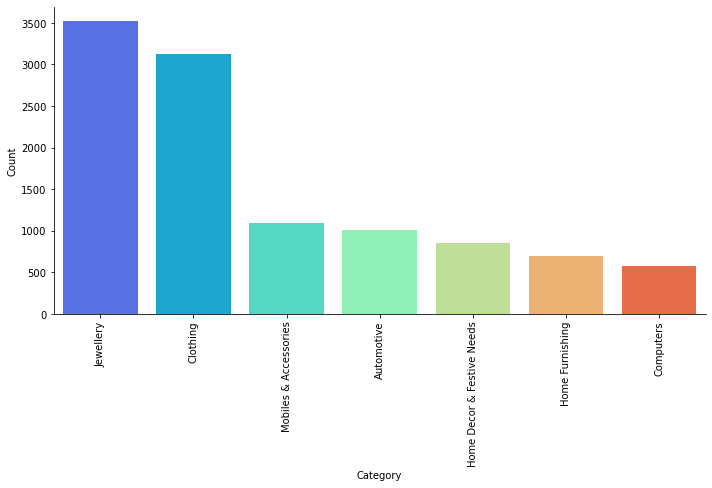

In [15]:
#visualisation give us brands with their counts with jewellery being highest
sns.catplot("Category", "Count", data=top_500_category, kind='bar',aspect=2,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [16]:
bottom_categories=count_of_category(500,primary_category_top,bottom=True,List=True)

In [17]:
print("The number of categories with count less then 500 :",len(bottom_categories))

The number of categories with count less then 500 : 254


In [18]:
flipkart_data["primary_category"]=primary_category
flipkart_data.head()

,product_name,product_category_tree,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies


In [19]:
app = dash.Dash(__name__)


In [20]:
app.layout = html.Div([
    html.H1('Flipkart Ecommerce Dashboard'),
    dcc.Graph(id='price-histogram', figure=px.histogram(df, x='retail_price', nbins=20)),
    dcc.Graph(id='category-bar-chart', figure=px.bar(df['product_category_tree'].value_counts(), x=df['product_category_tree'].value_counts().index, y=df['product_category_tree'].value_counts().values)),
    #dcc.Graph(id='ratings-scatter', figure=px.scatter(df, x='overall_rating', y='retail_price', trendline='ols')),
])

In [21]:
if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string # for removing punctuations in string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
new_stopwords = ["buy", "features", "key", "specifications","nan","NaN"]

#extending the stopwords with custom stopwords
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

In [24]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            #Using String Library
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            #our custom stpwrd
            if x.lower() in stpwrd:
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

In [25]:
obj = PreProcessText()
flipkart_data["description"]=flipkart_data["description"].apply(obj.token_words)

In [26]:
flipkart_data["description"]

0        [Alisha, Solid, Womens, Cycling, Shorts, Cotto...
1        [FabHomeDecor, Fabric, Double, Sofa, Bed, Fini...
2        [AW, Bellies, Sandals, Wedges, Heel, CasualsAW...
3        [Alisha, Solid, Womens, Cycling, Shorts, Cotto...
4        [Sicons, Purpose, Arnica, Dog, Shampoo, 500, m...
                               ...                        
19995    [WallDesign, Small, Vinyl, Sticker, Rs730, onl...
19996    [Wallmantra, Large, Vinyl, Stickers, Sticker, ...
19997    [Elite, Collection, Medium, Acrylic, Sticker, ...
19998    [Elite, Collection, Medium, Acrylic, Sticker, ...
19999    [Elite, Collection, Medium, Acrylic, Sticker, ...
Name: description, Length: 14058, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flipkart_data["description"],flipkart_data["primary_category"], test_size=0.33)

In [28]:
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))

In [34]:
X_train=X_train.dropna()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
#Importing the ML model
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [36]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#Training our model
model.fit(X_train,y_train)
prediction_tfid=model.predict(X_test)

ValueError: Input contains NaN